# Potentials

In this Notebook you can find the different Potentials, that are already implemented and can be used for your projects. Play around with the parameters to get familiar with the Potentials

Here you also can find classical Potentials like the harmonic Oscillator or the Lennard Jones Potential.

In [1]:
import os, sys
path = "../"
sys.path.append(path)


import numpy as np
from matplotlib import pyplot as plt

#Ensembler
from ensembler.potentials import OneD as potentials
from ensembler.potentials import TwoD as potentials2D

#Plotting:
import ensembler.visualisation.plotPotentials as vis

#params
test_timing_with_points =100


## Classics

### Harmonic Oscillator

The Harmonic Oscillator is one of the most used modelling potentials. Its based on hooke's law and can be used to describe obviously springs, but also covalent bonds of two atoms and many more physical relations.


Functional:

$V =  \frac{1}{2}*k*(r - r_0)^2+V_{offset} $

with:
* $k$ force constant
* $r_0$ optimal position (optimal covalent bond length)
* $r$ current position (current bond length)
* $V_{offset}$ minimal potential energy offset

first partial deviation by r

$\frac{\partial V}{\partial r} = k*(r - r_0) $



#### 1D

calculate 100 positions: 
Wall time: 0 ns

Visualization


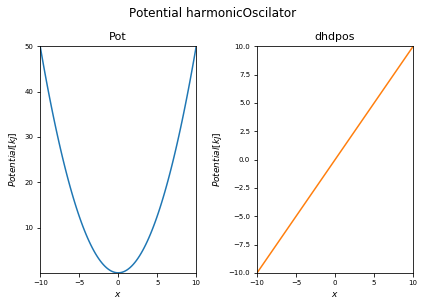

In [2]:
# 1D
positions = np.linspace(-10,10, test_timing_with_points)

V = potentials.harmonicOscillator()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

#### 2D

calculate 100 positions: 
Wall time: 998 µs

Visualization


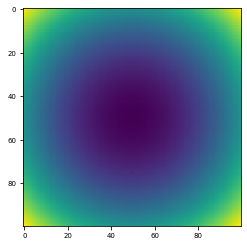

In [3]:
# 2D
positions = np.linspace(-4, 4, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

V = potentials2D.harmonicOscillator()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions2D)


print("\nVisualization")
plt.imshow(V.ene(positions2D).reshape([test_timing_with_points,test_timing_with_points]))

### Double Well Potential
The double well is a very nice potential.

Functional:

$V = \frac{V_{max}}{b^4}*((-\frac{a}{2} + r)^2-b^2)^2$


first order derivative

$\frac{\partial V}{\partial r} = \frac{V_max}{b^4}*(-2a + 4r)*((-a/2 + r)^2-b^2) $

calculate 100 positions: 
Wall time: 0 ns

Visualization


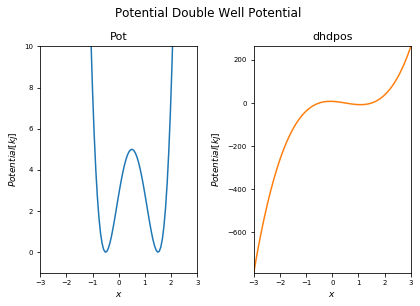

In [4]:
positions = np.linspace(-3, 3, test_timing_with_points)

V = potentials.doubleWellPot(a=1, b=1, Vmax=5)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)
axes[0].set_ylim([-1,10])
pass

### Wave Potential

Functional: 

$A*cos(m*(r + w)) + V_{off}$

first derivative:

$\frac{\partial V}{\partial r} = -A*m*sin(m*(r + w)) $

calculate 100 positions: 
Wall time: 505 µs

Visualization


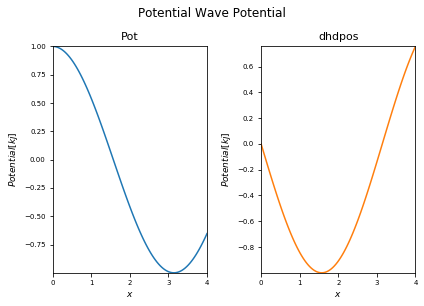

In [5]:
#1D
positions = np.linspace(0, 4, test_timing_with_points)

V = potentials.wavePotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

calculate 100 positions: 
Wall time: 1.02 ms

Visualization


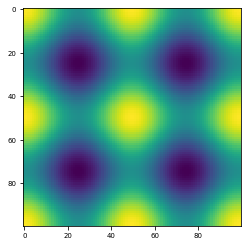

In [6]:
#2D
positions = np.linspace(-180, 180, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

V = potentials2D.wavePotential(multiplicity=[2,2], degree=True)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions2D)


print("\nVisualization")
plt.imshow(V.ene(positions2D).reshape([test_timing_with_points,test_timing_with_points]))

### Torsion Potential

calculate 100 positions: 
Wall time: 0 ns

Visualization


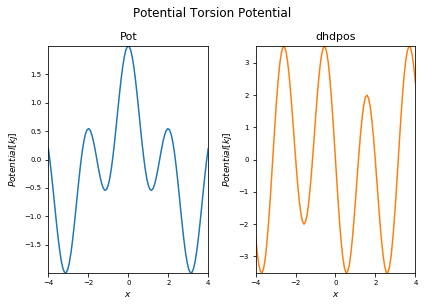

In [7]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.wavePotential(multiplicity=3)
w2 = potentials.wavePotential()
waves = [w1, w2]

V = potentials.torsionPotential(wavePotentials=waves)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)


### Lennard Jones Potential

Functional: 

$V = 4e*(\frac{s^{12}}{(r - r_0)^12} - \frac{s^6}{(r - r_0)^6}) +  V_{off}$

first derivative:

$\frac{\partial V}{\partial r} = 4e*(-12*\frac{s^{12}}{(r - r_0)^13} + 6*\frac{s^6}{(r - r_0)^7})$


calculate 100 positions: 
Wall time: 0 ns

Visualization


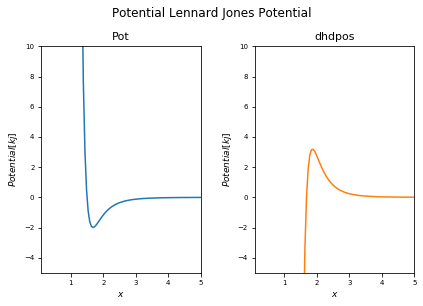

In [8]:
positions = np.linspace(0.1, 5, test_timing_with_points)

V = potentials.LennardJonesPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)
axes[0].set_ylim([-5, 10])
axes[1].set_ylim([-5, 10])
pass

### Culomb Potential


Functional: 

$V = \frac{q_1q_2}{(4 \pi \epsilon r)}$

first derivative:

$\frac{\partial V}{\partial r} = \frac{-q_1q_2}{(4\pi \epsilon r^2)}$



calculate 100 positions: 
Wall time: 0 ns

Visualization


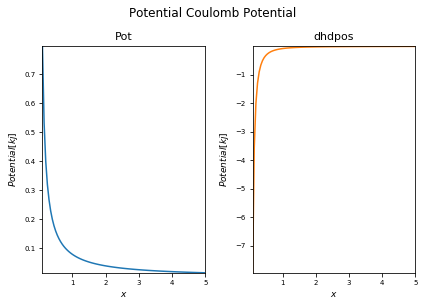

In [9]:
positions = np.linspace(0.1, 5, test_timing_with_points)

V = potentials.coulombPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

# Perturbed/MultiState Potentials

## linear coupled

Functional:

$V(r, \lambda) = \lambda V_a(r) + (1-\lambda) V_b(r)$


first order derivatives:


$\frac{\partial V}{\partial \lambda} = $

$\frac{\partial V}{\partial r} = $


calculate 100 positions: 
Wall time: 0 ns

Visualization


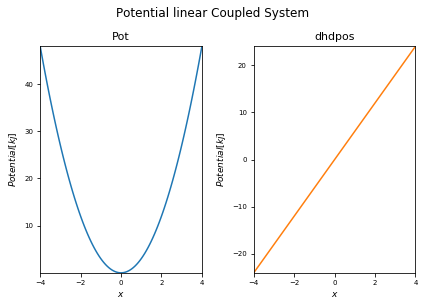

In [10]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator()
w2 = potentials.harmonicOscillator(k=11)

V = potentials.linearCoupledPotentials(Va=w1, Vb=w2)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)



Visualization


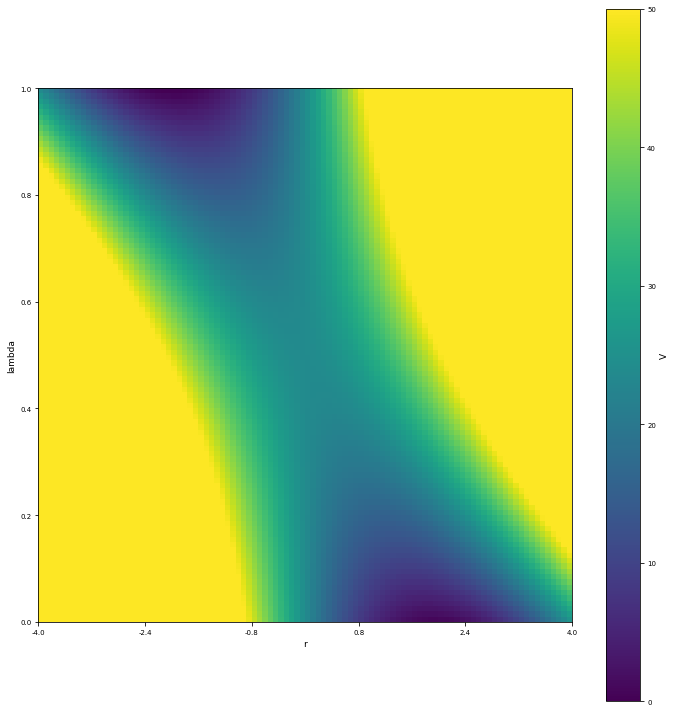

In [11]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator(k=10, x_shift=-2)
w2 = potentials.harmonicOscillator(k=10, x_shift=2)


w1 = potentials.harmonicOscillator(k=12, x_shift=-2)
w2 = potentials.harmonicOscillator(k=12, x_shift=2)
V = potentials.linearCoupledPotentials(Va=w1, Vb=w2)

lambda_ene = []
for lam in np.arange(0, 1, 0.01):
    V.set_lam(lam)
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=50)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()


# exponential Copuled - Enveloping Potential


Used in EDS

Functional:

$V(r) = -\frac{1}{k_b T s} ln(e^{- k_b T s (V_i-E^{off}_i)}+e^{-k_b T s (V_j-E^{off}_j)})$ 



calculate 100 positions: 
Wall time: 0 ns

Visualization


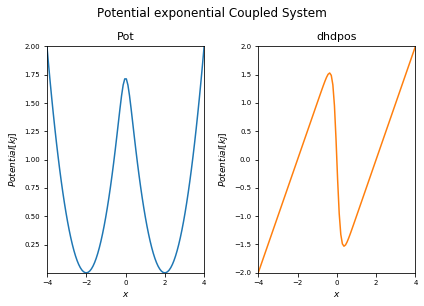

(0, 2)

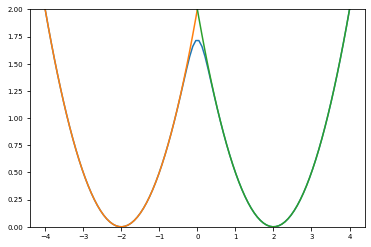

In [12]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator(x_shift=-2)
w2 = potentials.harmonicOscillator(x_shift=2)

#print(w1, w2)
V = potentials.exponentialCoupledPotentials(Va=w1, Vb=w2, s=1, eoffA=0, eoffB=0)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)
plt.show()
plt.close()
plt.plot(positions, V.ene(positions))
plt.plot(positions, w1.ene(positions))
plt.plot(positions, w2.ene(positions))


plt.ylim([0,2])


# linear & exponential hybrid Copuled - $\lambda$ EDS

Functional:

$V(r) = -\frac{1}{k_b T s} ln(\lambda e^{- k_b T s (V_i-E^{off}_i)}+(1-\lambda)e^{-k_b T s (V_j-E^{off}_j)})$ 



calculate 100 positions: 
Wall time: 0 ns

Visualization


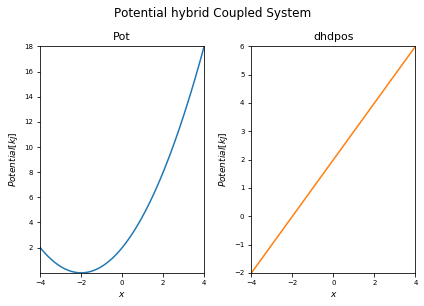

In [16]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator(x_shift=-2)
w2 = potentials.harmonicOscillator(x_shift=2)

V = potentials.hybridCoupledPotentials(Va=w1, Vb=w2, lam=0)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

#perturbed potentilas



Visualization


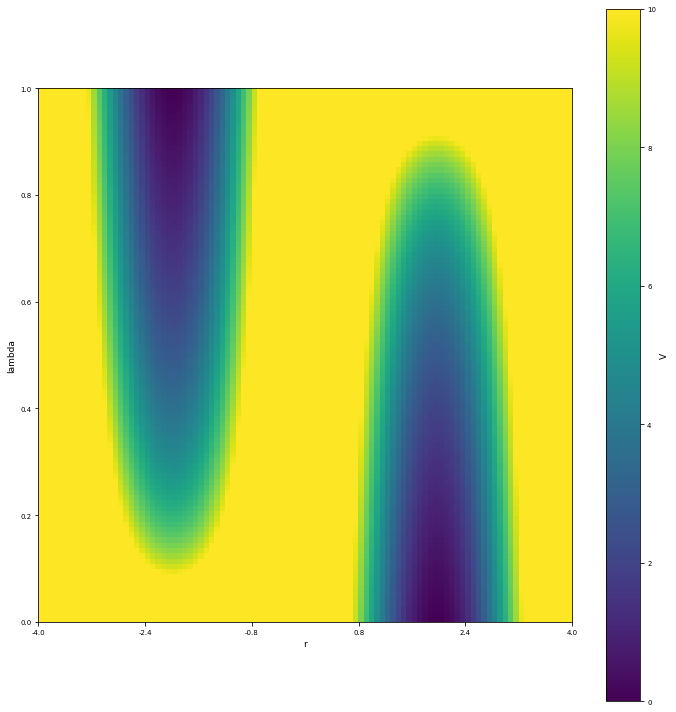

In [14]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator(k=12, x_shift=-2)
w2 = potentials.harmonicOscillator(k=12, x_shift=2)
V = potentials.hybridCoupledPotentials(Va=w1, Vb=w2, s=0.1)

#ha=harmonicOsc(fc=1.0, x_shift=0.0), hb=harmonicOsc(fc=3.0, x_shift=10.0), s=0.05, temp=300.0

lambda_ene = []
for lam in np.arange(0, 1.01, 0.01):
    V.set_lam(lam)
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=10)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()



Visualization


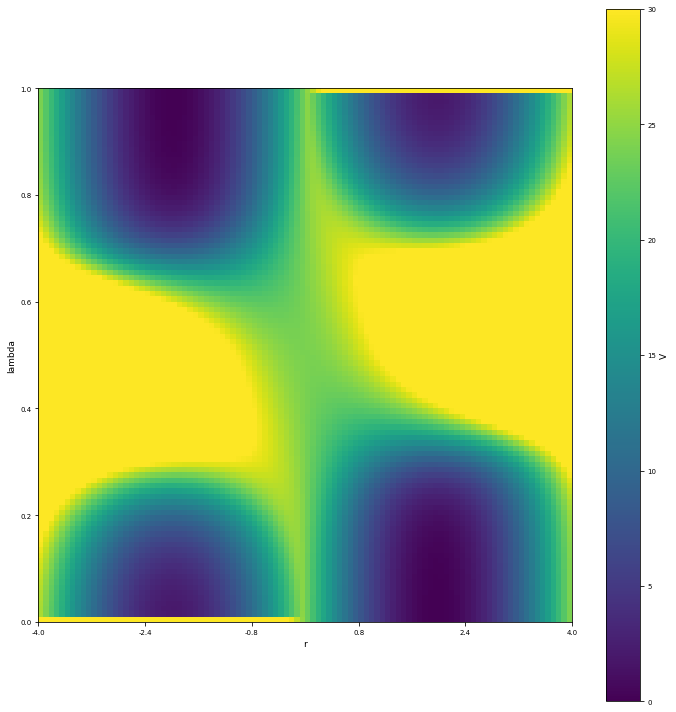

In [15]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator(k=12, x_shift=-2)
w2 = potentials.harmonicOscillator(k=12, x_shift=2)
V = potentials.hybridCoupledPotentials(Va=w1, Vb=w2, s=0.1)


points=50
lambda_ene = []
for lam, s in zip(np.linspace(0, 0.5, points), np.logspace(0, -3,  points)):
    V.set_lam(lam)
    V.set_s(s)
    lambda_ene.append(V.ene(positions))
for lam, s in zip(np.linspace(0.51, 1,  points), np.logspace(-3, 0,  points)):
    V.set_lam(lam)
    V.set_s(s)
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=30)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()


# Special Potential

The Gerhard Koenich Memorial

## dummy Potential

This potential returns always the same value independt on its position.

Functional:
$V(r)=x$


calculate 100 positions: 
Wall time: 0 ns

Visualization


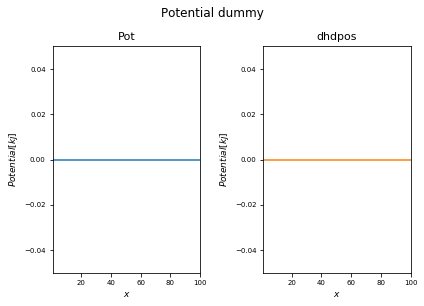

In [17]:
positions = np.linspace(1,100, test_timing_with_points)

V = potentials.dummyPotential()

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

## Flatwell Potential

A potential return dependent on a position a value in a binary fashion

calculate 102 positions: 
Wall time: 0 ns

Visualization


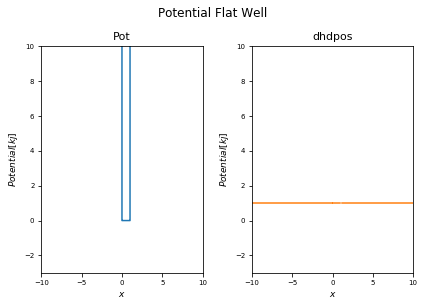

In [2]:
positions = sorted(list(np.linspace(-10,10, test_timing_with_points))+[1, 0])

V = potentials.flatwell()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions, y_range=[-3, 10])